# Libraries

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image
import random

# Set Path 

In [7]:
train_folder = "Training"
test_folder = "Testing"

# Load Images 

In [19]:
def load_sample_image_from_folder(folder):
    filenames = os.listdir(folder)
    filename = random.choice(filenames)
    image_path = os.path.join(folder, filename)
    img = Image.open(image_path)
    return img

# List of classes (tumor types)


In [37]:
classes = os.listdir(train_folder)
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

# Check Class Imbalance

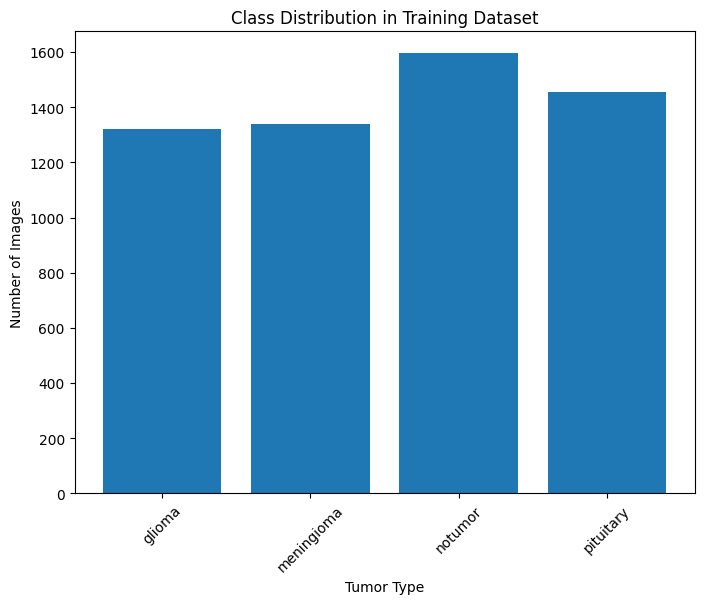

In [38]:
class_counts = {}
for tumor_type in classes:
    tumor_folder = os.path.join(train_folder, tumor_type)
    num_images = len(os.listdir(tumor_folder))
    class_counts[tumor_type] = num_images

plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

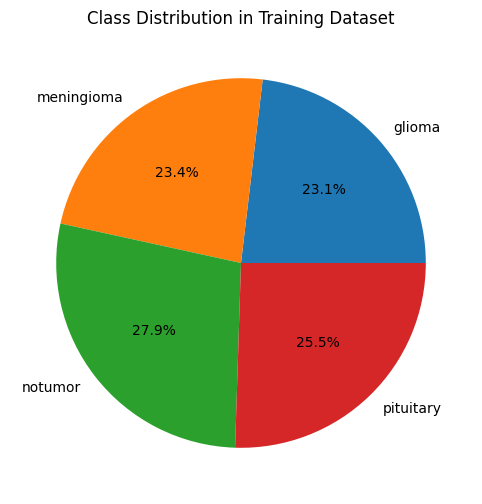

In [39]:
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title('Class Distribution in Training Dataset')
plt.show()

# PLot Sample Images 

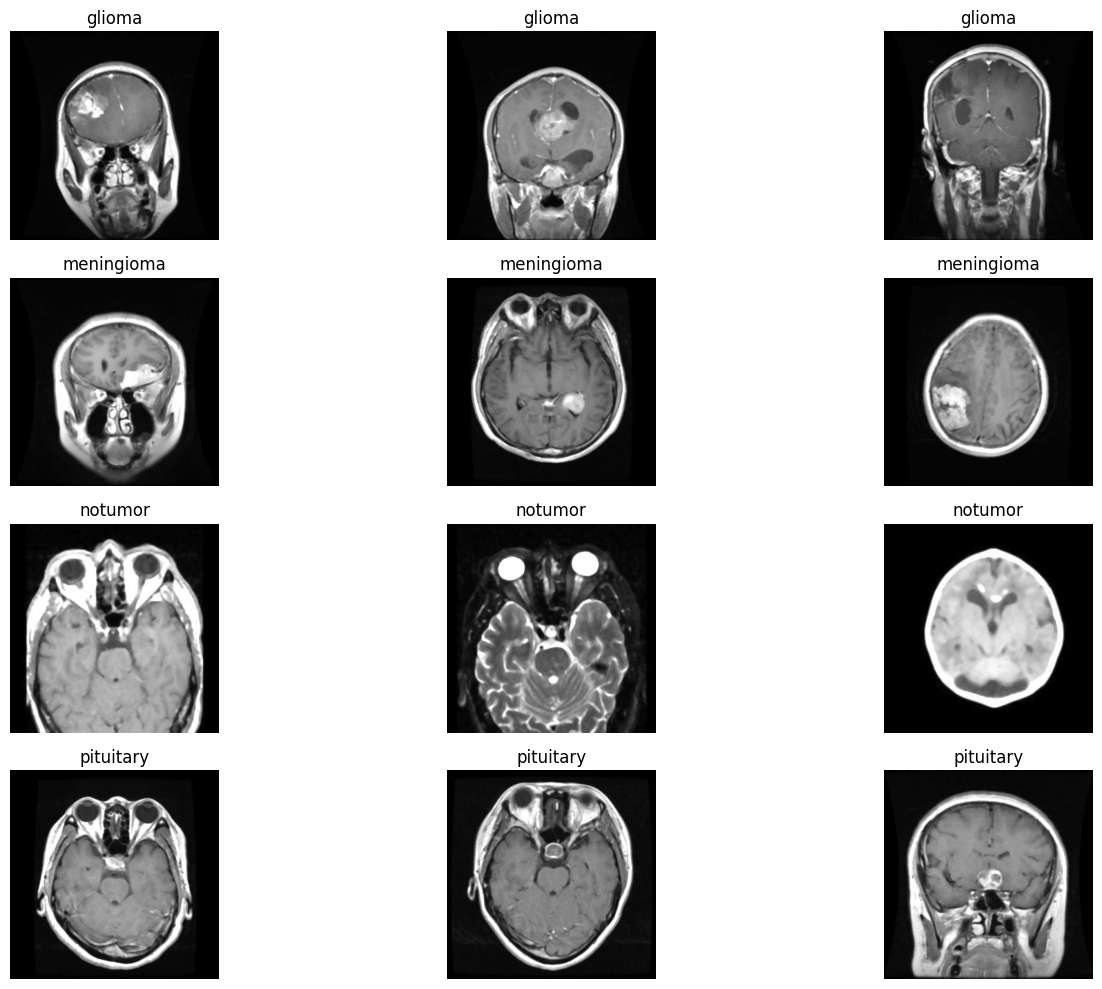

In [40]:
num_images_per_class = 3
fig, axes = plt.subplots(len(classes), num_images_per_class, figsize=(15, 10))

for i, class_name in enumerate(classes):
    class_folder = os.path.join(train_folder, class_name)
    image_files = os.listdir(class_folder)[:num_images_per_class]
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_folder, image_file)
        image = mpimg.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off') 
        axes[i, j].set_title(class_name)
        
plt.tight_layout()
plt.show()

# Histogram Comparision between Orignal and PreProcessed IMages

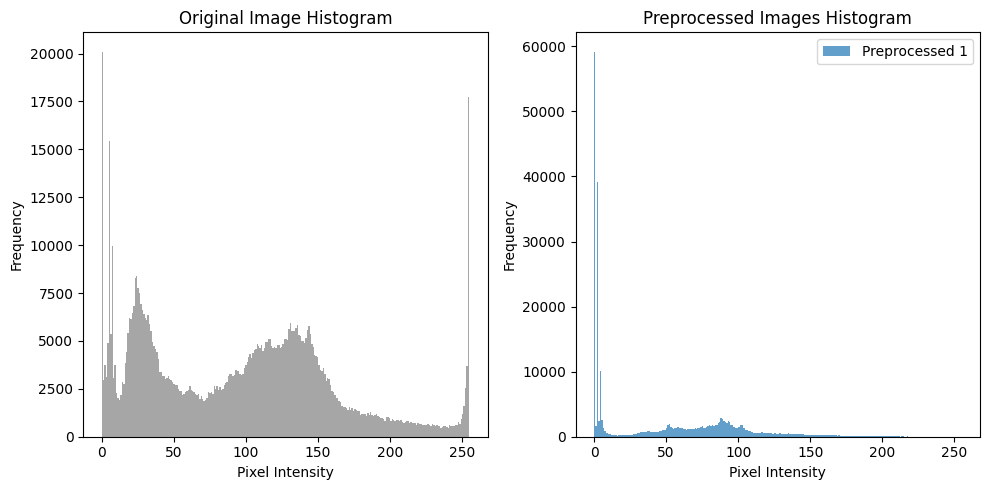

In [36]:
train_folder = "PreProcesed_images/Trainning"
category = "glioma"  
subfolder_path = os.path.join(train_folder, category)
original_image = load_sample_image_from_folder(subfolder_path)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(np.array(original_image).flatten(), bins=256, color='gray', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
num_preprocessed_images = 1  
plt.subplot(1, 2, 2)
for i in range(num_preprocessed_images):
    preprocessed_image = load_sample_image_from_folder(subfolder_path)
    if preprocessed_image.mode != 'L':
        preprocessed_image = preprocessed_image.convert('L')
    plt.hist(np.array(preprocessed_image).flatten(), bins=256, alpha=0.7, label=f'Preprocessed {i+1}')
plt.title('Preprocessed Images Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()